# Boston Housing Dataset
Szeyi Chan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset from the given URL
url = "https://raw.githubusercontent.com/DrUzair/MachineLearning/master/Datasets/Boston.csv"
data = pd.read_csv(url, index_col=0)

In [2]:
# Data cleaning step: normalizing the data
# Formula = (X - min(X)) / (max(X) - min(X))
def min_max_normalize(df):
    result = df.copy()
    for column in result.columns:
        min_value = result[column].min()
        max_value = result[column].max()
        result[column] = (result[column] - min_value) / (max_value - min_value)
    return result

# Apply the normalization function to the data
normalized_data = min_max_normalize(data)

# Display the first few rows of the normalized dataframe
normalized_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
2,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
3,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
4,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
5,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [3]:
normalized_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Split the data into train & test sets with 80-20 ratio
train_df, test_df = train_test_split(
    normalized_data, test_size=0.2, random_state=42)

In [5]:
# medv is our target so we drop it and use medv as our target
X_train = train_df.drop(columns=['medv'])
y_train = train_df['medv']
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
478,0.168788,0.00,0.646628,0.0,0.471193,0.333972,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
16,0.006981,0.00,0.281525,0.0,0.314815,0.435524,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
333,0.000319,0.35,0.205279,0.0,0.108848,0.473271,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
424,0.079174,0.00,0.646628,0.0,0.471193,0.487066,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
20,0.008087,0.00,0.281525,0.0,0.314815,0.415022,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521


In [6]:
# same for the test data: medv is our target so we drop it and use medv as our target
X_test = test_df.drop(columns=['medv'])
y_test = test_df['medv']
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
174,0.000961,0.0,0.131598,0.0,0.257202,0.547040,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
275,0.000563,0.4,0.218109,1.0,0.127572,0.612569,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
492,0.001117,0.0,1.000000,0.0,0.460905,0.464074,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
73,0.000959,0.0,0.379399,0.0,0.057613,0.479785,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
453,0.057141,0.0,0.646628,0.0,0.674897,0.524238,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808


In [7]:
# statistical summary of the training data
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040495,0.115693,0.385816,0.071782,0.352848,0.527858,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099754,0.231525,0.252735,0.258447,0.242190,0.135936,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000031,0.000000,0.010264,0.000000,0.000000,0.057865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000844,0.000000,0.171188,0.000000,0.137860,0.446350,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002867,0.000000,0.296921,0.000000,0.314815,0.507568,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035929,0.200000,0.646628,0.000000,0.506173,0.589337,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# check to see if there are any null values in the training data
X_train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

In [9]:
# Derive the OLS normal equation and implement the algorithm: w = (X^T \dot X)^-1 \dot X^T \dot y
# where w is the weight vector, X is the feature matrix, and y is the target vector
# Derive steps please see pdf file

def ols_normal_equation(X, y):
    X_transpose = np.transpose(X)
    w = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return w

# Train the model on the training set
ols_w = ols_normal_equation(X_train, y_train)
print(ols_w)

[-0.19321825  0.07172893  0.07937511  0.05873326 -0.1023822   0.77210672
  0.02342422 -0.17008782  0.10023491 -0.10459366 -0.12221133  0.20272807
 -0.3028396 ]


In [10]:
# Make predictions on the test set and using the weight vector from the training set
y_ols_predict = X_test.dot(ols_w)
print(y_ols_predict)

174    0.487027
275    0.648558
492    0.275681
73     0.403059
453    0.350890
         ...   
413   -0.211846
437    0.165897
412    0.212162
87     0.349657
76     0.417470
Length: 102, dtype: float64


In [11]:
# for comparison with the ridge regression
ols_w_T_w = ols_w.T.dot(ols_w)
print("ols w^T w=", ols_w_T_w)

ols w^T w= 0.8570707616877095


In [12]:
# Predefined values of lambda
lambda_value = [0.5, 1, 1.5, 2]
ridge_predicted_values = {}
ridge_w_T_w = {}

# Implement the ridge regression algorithm: w = (X^T \dot X + \lambda I)^-1 \dot X^T \dot y
def ridge_regression(X, y, each_lambda):
    X_transpose = np.transpose(X)
    identity_matrix = np.identity(X.shape[1])
    w = np.linalg.inv(X_transpose.dot(X) + each_lambda *
                          identity_matrix).dot(X_transpose).dot(y)
    return w

for each_lambda in lambda_value:
    # Train the model on the training set with each lambda value
    ridge_w = ridge_regression(X_train, y_train, each_lambda)
    # print(ridge_w)
    ridge_w_T_w[each_lambda] = ridge_w.T.dot(ridge_w)

    # Make predictions on the test set
    # Using the weight vector from the training set
    y_ridge_predict = X_test.dot(ridge_w)
    ridge_predicted_values[each_lambda] = y_ridge_predict

# print(ridge_predicted_values)

# for comparison with the ols regression, making sure that the ridge regression is smaller than the ols regression
print("ridge w^T w=", ridge_w_T_w)

ridge w^T w= {0.5: 0.7677970949581294, 1: 0.7014684378748728, 1.5: 0.6490780179969073, 2: 0.6060177472819557}


In [13]:
# Calculate the Mean Squared Error (MSE) to evaluate the model on the test set
ols_mse = np.square(np.subtract(y_test, y_ols_predict)).mean()
print("OLS MSE = ",ols_mse)

# Calculate the R^2 score for OLS
ols_r2 = 1 - np.sum(np.square(y_test - y_ols_predict)) / \
    np.sum(np.square(y_test - np.mean(y_test)))
print("OLS R^2 =", ols_r2)

ridge_mse = {}
ridge_r2 = {}
for each_lambda in lambda_value:
    ridge_mse[each_lambda] = np.square(np.subtract(y_test, ridge_predicted_values[each_lambda])).mean()
    ridge_r2[each_lambda] = 1 - np.sum(np.square(y_test - ridge_predicted_values[each_lambda])) / np.sum(np.square(y_test - np.mean(y_test)))

print("RIDGE MSE = ", ridge_mse)
print("RIDGE R^2 = ", ridge_r2)

OLS MSE =  0.015535205407787614
OLS R^2 = 0.5710191184055726
RIDGE MSE =  {0.5: 0.015264097324977417, 1: 0.015107485092905132, 1.5: 0.01502318778269254, 2: 0.01498838953541249}
RIDGE R^2 =  {0.5: 0.578505352498943, 1: 0.582829959198328, 1.5: 0.5851577001905977, 2: 0.5861186004429145}


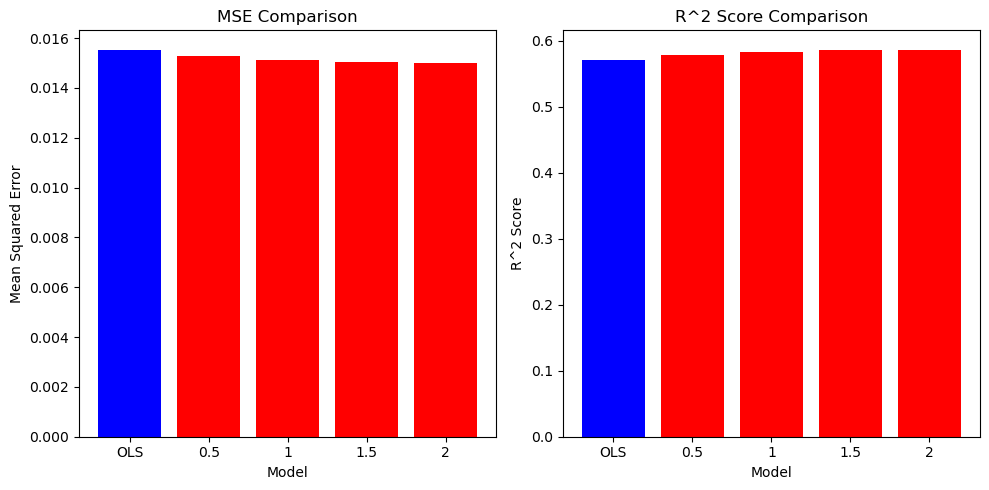

In [14]:
# Sample data for plotting (assuming you have values for 'ols_r2' and 'ridge_r2' similar to 'ols_mse' and 'ridge_mse')
ridge_r2_params = [str(l) for l in ridge_r2.keys()]
ridge_r2_values = list(ridge_r2.values())

# Plot MSE comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['OLS'] + ridge_r2_params, [ols_mse] + list(ridge_mse.values()),
        color=['blue'] + ['red'] * len(ridge_r2_params))
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison')

# Plot R^2 comparison
plt.subplot(1, 2, 2)
plt.bar(['OLS'] + ridge_r2_params, [ols_r2] + ridge_r2_values,
        color=['blue'] + ['red'] * len(ridge_r2_params))
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

plt.tight_layout()
plt.show()

### Observation:
- Here are the results of the OLS and Ridge regression models on the Boston Housing Dataset:
- -ols w^T w= 0.8570707616877095
- -ridge w^T w= {0.5: 0.7677970949581294, 1: 0.7014684378748728, 1.5: 0.6490780179969073, 2: 0.6060177472819557}
- -OLS MSE =  0.015535205407787614
- -OLS R^2 = 0.5710191184055726
- -RIDGE MSE =  {0.5: 0.015264097324977417, 1: 0.015107485092905132, 1.5: 0.01502318778269254, 2: 0.01498838953541249}
- -RIDGE R^2 =  {0.5: 0.578505352498943, 1: 0.582829959198328, 1.5: 0.5851577001905977, 2: 0.5861186004429145}
- The Ridge regression model has a lower MSE and higher R^2 value compared to the OLS model. This is because the Ridge regression model is able to reduce the complexity of the model by adding a penalty term (lambda and I) to the loss function to prevent overfitting and improve the generalization of the model. Therefore as we can see from the w^t w values, the Ridge regression model has a smaller w^T w value compared to the OLS model, which indicates that the Ridge regression model has a simpler model with smaller coefficients. This results in a lower MSE and higher R^2 value for the Ridge regression model compared to the OLS model.